In [1]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [2]:
df = pd.read_csv("D:VOF.L.csv", index_col = 'Date', parse_dates = True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,272.0,275.000000,272.000000,273.25,233.939148,170046
2017-01-04,272.0,275.000000,272.000000,272.75,233.511093,107823
2017-01-05,272.0,274.500000,270.250000,272.50,233.297043,391623
2017-01-06,272.5,273.750000,266.000000,273.00,233.725098,464329
2017-01-09,273.0,273.500000,270.000000,273.50,234.153183,276108
...,...,...,...,...,...,...
2022-03-25,502.0,507.000000,502.000000,507.00,493.078217,265108
2022-03-28,502.0,511.000000,502.000000,506.00,492.105652,115303
2022-03-29,502.0,520.000000,500.000000,518.00,503.776154,149574


In [3]:
df['Time'] = np.arange(len(df.index))
df

,Open,High,Low,Close,Adj Close,Volume,Time
Date,,,,,,,
2017-01-03,272.0,275.000000,272.000000,273.25,233.939148,170046,0
2017-01-04,272.0,275.000000,272.000000,272.75,233.511093,107823,1
2017-01-05,272.0,274.500000,270.250000,272.50,233.297043,391623,2
2017-01-06,272.5,273.750000,266.000000,273.00,233.725098,464329,3
2017-01-09,273.0,273.500000,270.000000,273.50,234.153183,276108,4
...,...,...,...,...,...,...,...
2022-03-25,502.0,507.000000,502.000000,507.00,493.078217,265108,1323
2022-03-28,502.0,511.000000,502.000000,506.00,492.105652,115303,1324
2022-03-29,502.0,520.000000,500.000000,518.00,503.776154,149574,1325


Text(0.5, 1.0, 'VNC stock closing price')

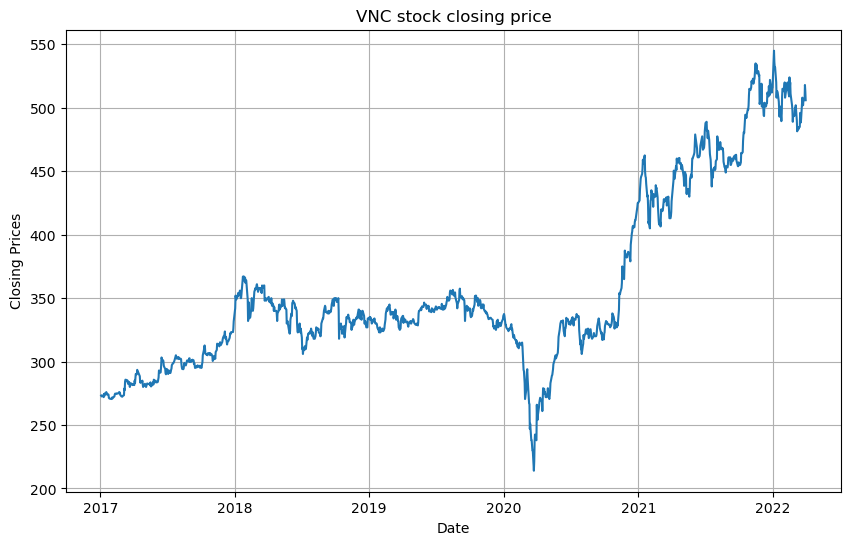

In [4]:
df_close = df['Close']

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(df_close)
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.title('VNC stock closing price')

In [6]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM, Flatten
from keras.layers import ConvLSTM2D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [7]:
dataset = df.values
sc = MinMaxScaler(feature_range = (0,1))
data_scaled = sc.fit_transform(dataset)

In [12]:
x = df.loc[:, ['Time']]  
y = df.loc[:, 'Close']  


model = LinearRegression()
model.fit(x, y)

y_pred = pd.Series(model.predict(x), index=x.index)

In [11]:
from sklearn.linear_model import LinearRegression

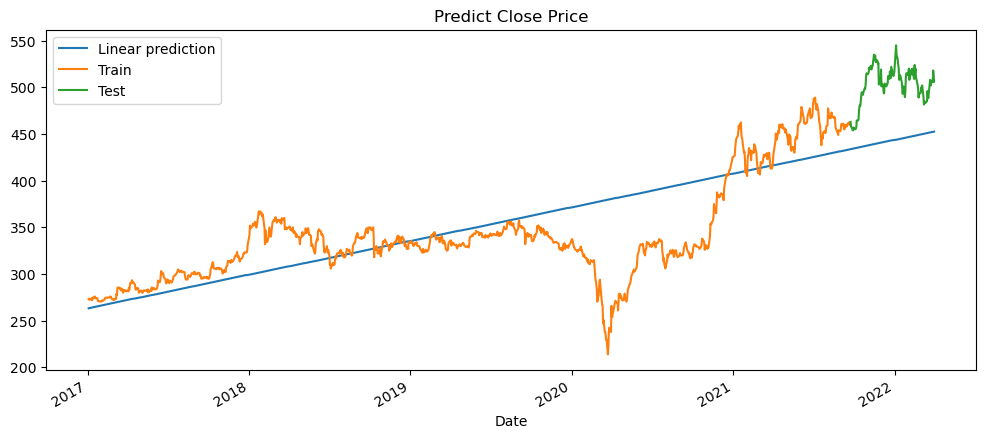

In [13]:
train = df.Close[:round(len(df)*0.9)]
test = df.Close[round(len(df)*0.9):]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
plt.figure(figsize = (12,5))
plt.title('Predict Close Price')
y_pred.plot(label = 'Linear prediction')
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.legend(loc = 'upper left')
plt.show()

In [14]:
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)

ValueError: Expected 2D array, got 1D array instead:
array=[265.44056066 339.38109399 404.45448406 327.51056349 366.98365285
 388.43641881 427.48045285 339.52411243 318.35738335 419.32840179
 400.87902307 414.60879328 320.78869683 351.82369825 411.46238761
 373.70551952 305.77176066 302.3393181  281.60164434 404.5975025
 436.77665144 332.65922732 431.19893229 422.04575215 378.99720179
 289.46765853 347.53314505 294.47330392 300.33705995 392.86999044
 431.34195073 384.86095782 365.41045002 416.89708832 333.6603564
 396.01639612 289.61067697 281.17258903 429.19667413 321.93284434
 370.27307697 346.38899754 412.60653512 400.44996775 345.10183158
 403.02429966 350.82256917 423.47593654 413.6076642  299.62196775
 396.87450676 267.58583725 322.5049181  407.60088973 364.55233938
 428.62460037 294.61632236 273.73563016 420.32953087 447.50303441
 312.49362732 450.50642165 349.39238477 375.85079612 441.35324151
 281.31560747 400.59298619 296.76159895 370.70213229 350.53653229
 445.78681314 438.20683583 347.39012661 356.25726988 291.46991669
 269.58809541 417.61218051 444.2136103  434.34533796 403.1673181
 395.44432236 278.16920179 270.01715073 378.71116491 274.02166704
 366.26856066 421.75971527 436.34759612 343.95768406 273.02053796
 290.32576917 406.59976066 447.0739791  389.86660321 307.20194505
 310.77740605 280.88655215 447.64605285 307.48798193 303.62648406
 278.88429399 404.31146562 356.6863252  397.16054363 319.64454931
 317.64229115 437.34872519 357.40141739 356.97236207 384.4319025
 420.18651243 419.61443867 366.55459754 305.62874222 351.96671668
 399.01978335 396.44545144 429.33969257 303.19742874 420.04349399
 384.71793938 329.94187697 283.03182874 320.07360463 364.12328406
 358.97462023 325.50830534 280.17145995 283.46088406 357.25839895
 284.46201314 282.03069966 335.23355924].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [15]:
#RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE: ", rmse)
#MAPE
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("MAPE: ", mape)

RMSE:  41.20263642118932
MAPE:  8.777765948648774


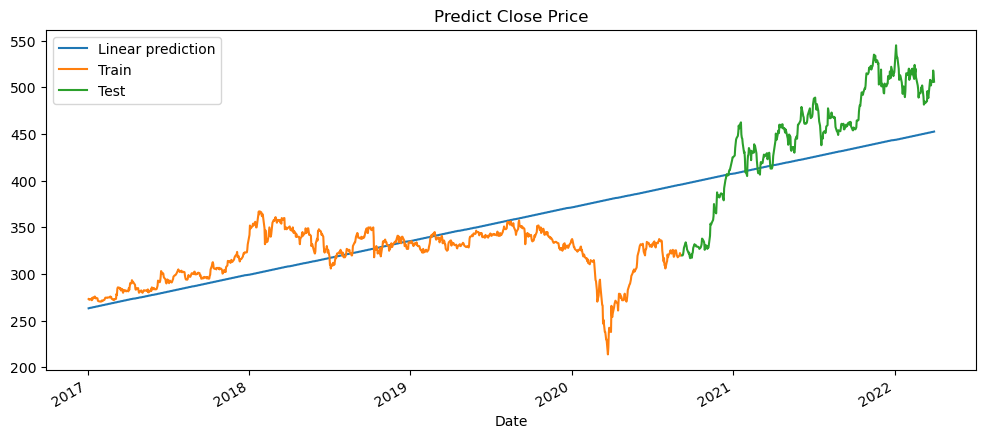

In [16]:
train = df.Close[:round(len(df)*0.7)]
test = df.Close[round(len(df)*0.7):]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
plt.figure(figsize = (12,5))
plt.title('Predict Close Price')
y_pred.plot(label = 'Linear prediction')
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.legend(loc = 'upper left')
plt.show()

In [17]:
#RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE: ", rmse)
#MAPE
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("MAPE: ", mape)

RMSE:  45.7724570800627
MAPE:  9.830947393830092


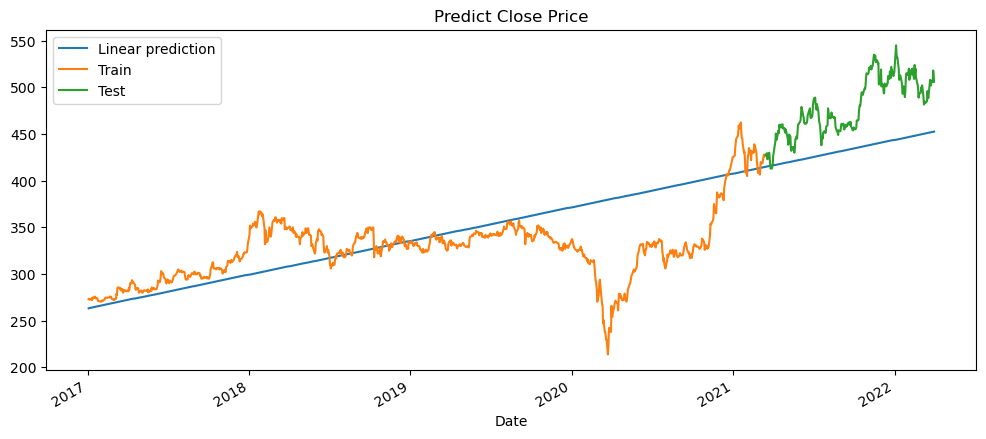

In [18]:
train = df.Close[:round(len(df)*0.8)]
test = df.Close[round(len(df)*0.8):]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
plt.figure(figsize = (12,5))
plt.title('Predict Close Price')
y_pred.plot(label = 'Linear prediction')
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.legend(loc = 'upper left')
plt.show()

In [19]:
#RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE: ", rmse)
#MAPE
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("MAPE: ", mape)

RMSE:  40.61952407080113
MAPE:  8.632698811483545
